## Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import tree
import warnings
warnings.filterwarnings("ignore") 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

print ("Libraries Imported")

Using TensorFlow backend.


Libraries Imported


## Load the data

In [3]:
data= pd.read_csv('Data.csv')

print ("Loaded the data")

Loaded the data


The curve corresponding to the sum of the product of one type sold in a week

The curve corresponding to the sum of the product of one type sold in a week


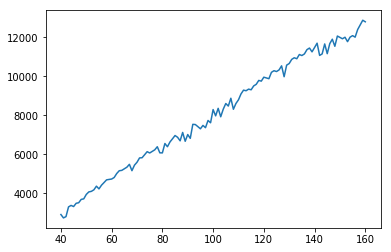

In [5]:
print ("The curve corresponding to the sum of the product of one type sold in a week")
plt.plot(data[data['brand']=='Health_Drink_A'].groupby(by='week')['week'].sum())

In [6]:
print (data.head())

   store           brand  week  Unit_Sold  Adv  Price       AGE       EDU  \
0      2  Health_Drink_A    40   9.018695    0   3.87  0.232865  0.248935   
1      2  Health_Drink_A    46   8.723231    0   3.87  0.232865  0.248935   
2      2  Health_Drink_A    47   8.253228    0   3.87  0.232865  0.248935   
3      2  Health_Drink_A    48   8.987197    0   3.87  0.232865  0.248935   
4      2  Health_Drink_A    50   9.093357    0   3.87  0.232865  0.248935   

   ETHNICITY     INCOME  Household  WOMENWORK     VALUE  WAREHOUSE_DIST  \
0    0.11428  10.553205   0.103953   0.303585  0.463887        2.110122   
1    0.11428  10.553205   0.103953   0.303585  0.463887        2.110122   
2    0.11428  10.553205   0.103953   0.303585  0.463887        2.110122   
3    0.11428  10.553205   0.103953   0.303585  0.463887        2.110122   
4    0.11428  10.553205   0.103953   0.303585  0.463887        2.110122   

    RATIO_1  SUPERMARKET_DIST   RATIO_2  
0  1.142857           1.92728  0.376927  
1 

In [7]:
print ("Information of the data")

print (data.columns)
print (data.info())

Information of the data
Index(['store', 'brand', 'week', 'Unit_Sold', 'Adv', 'Price', 'AGE', 'EDU',
       'ETHNICITY', 'INCOME', 'Household', 'WOMENWORK', 'VALUE',
       'WAREHOUSE_DIST', 'RATIO_1', 'SUPERMARKET_DIST', 'RATIO_2'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28947 entries, 0 to 28946
Data columns (total 17 columns):
store               28947 non-null int64
brand               28947 non-null object
week                28947 non-null int64
Unit_Sold           28947 non-null float64
Adv                 28947 non-null int64
Price               28947 non-null float64
AGE                 28947 non-null float64
EDU                 28947 non-null float64
ETHNICITY           28947 non-null float64
INCOME              28947 non-null float64
Household           28947 non-null float64
WOMENWORK           28947 non-null float64
VALUE               28947 non-null float64
WAREHOUSE_DIST      28947 non-null float64
RATIO_1             28947 non-null float6

No missing value is found in the data

Pivot table of the data.

In [8]:
pd.pivot_table(data, values='Unit_Sold', index=['brand'],columns=['store'], aggfunc=np.sum)

store,2,5,8,9,12,14,18,21,28,32,...,123,124,126,128,129,130,131,132,134,137
brand,,,,,,,,,,,,,,,,,,,,,
Health_Drink_A,1014.915794,1071.300755,1094.579809,1103.456712,1094.832131,1114.867060,1052.875822,1023.006854,1014.184108,1161.497311,...,1105.104759,1109.121946,1100.304256,1163.158770,1073.401918,1026.995720,1060.637988,1113.020537,747.049767,1013.749379
Health_Drink_B,1000.026131,1084.793548,1128.880679,1076.499330,1109.250802,1075.601694,1069.011723,1081.985543,1018.273336,1148.065701,...,1136.127301,1126.767738,1111.995761,1154.881370,1063.100015,1085.807564,1079.009361,1151.142141,749.215151,961.353783
Health_Drink_C,998.131226,1037.112012,1164.658095,1041.365046,1078.787392,1004.822754,1069.317228,1117.746764,975.657296,1132.170266,...,1123.616616,1165.578336,1075.701830,1129.760236,1017.751341,1137.436575,1066.437882,1191.534453,765.905238,945.489985


## Correlation Study

In [9]:
print ("Correlation of the unit sold with different parameters")
data.corr()['Unit_Sold'].sort_values()

Correlation of the unit sold with different parameters


Price              -0.431983
RATIO_2            -0.119064
RATIO_1            -0.089882
WOMENWORK          -0.080538
Household          -0.057259
INCOME             -0.042779
WAREHOUSE_DIST     -0.002407
EDU                 0.004551
SUPERMARKET_DIST    0.016780
VALUE               0.017664
store               0.036128
ETHNICITY           0.059867
AGE                 0.092050
week                0.102638
Adv                 0.536297
Unit_Sold           1.000000
Name: Unit_Sold, dtype: float64

The following block gives a correlation between the unit sold and different parameters for each of the product. This gives an idea of the relation between the unit sold and the important parameters affecting them.

Correlation for Health_Drink_A
Price              -0.632457
Household          -0.226504
RATIO_1            -0.206945
RATIO_2            -0.099792
ETHNICITY          -0.055083
WAREHOUSE_DIST     -0.051154
SUPERMARKET_DIST   -0.024051
WOMENWORK          -0.020918
store              -0.009784
INCOME              0.094921
AGE                 0.144482
week                0.169413
EDU                 0.219057
VALUE               0.273371
Adv                 0.474566
Unit_Sold           1.000000
Name: Unit_Sold, dtype: float64
-->Unit_Sold is positive correleated with demographic like EDU and negative correlated with demographic like household
                                   Heat Map of A


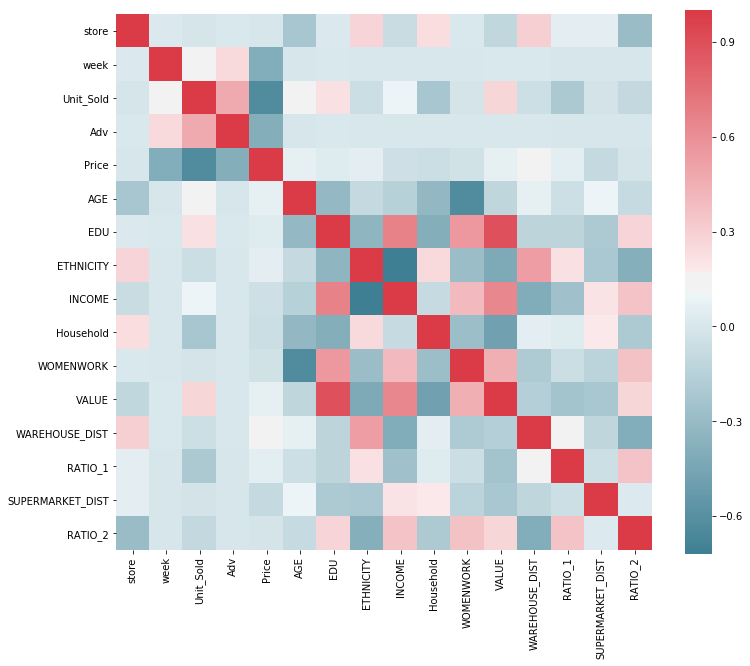

Correlation for Health_Drink_B
Price              -0.593550
RATIO_2            -0.116209
RATIO_1            -0.077139
WOMENWORK          -0.064566
Household          -0.055813
INCOME             -0.018665
SUPERMARKET_DIST    0.008250
week                0.009678
WAREHOUSE_DIST      0.022854
EDU                 0.031293
store               0.037626
VALUE               0.042352
ETHNICITY           0.057472
AGE                 0.079750
Adv                 0.663240
Unit_Sold           1.000000
Name: Unit_Sold, dtype: float64
-->Unit_Sold is positive correleated with demographic like Age and negative correlated with demographic like Womenwork
                                   Heat Map of B


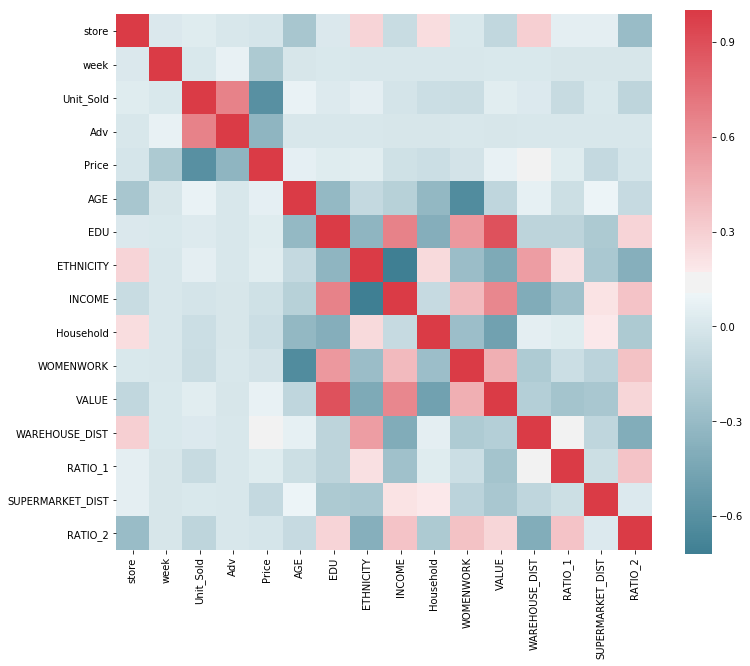

Correlation for Health_Drink_C
Price              -0.622544
VALUE              -0.183881
EDU                -0.169781
INCOME             -0.161678
RATIO_2            -0.138369
WOMENWORK          -0.138282
RATIO_1            -0.019712
WAREHOUSE_DIST      0.011290
SUPERMARKET_DIST    0.053288
Household           0.060199
AGE                 0.067483
store               0.068492
week                0.134792
ETHNICITY           0.145136
Adv                 0.470454
Unit_Sold           1.000000
Name: Unit_Sold, dtype: float64
-->Unit_Sold is positive correleated with demographic like Ethinicity and negative correlated with demographic like EDU
                                   Heat Map of C


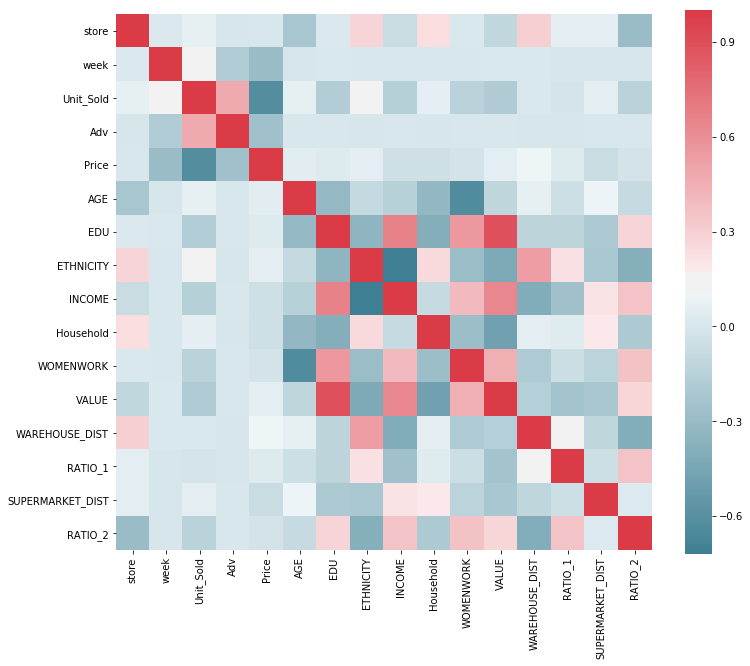

In [10]:
#Demographic factors influence the sale of three brands of health drinks

print("Correlation for Health_Drink_A")

data_corr = data[data['brand']== 'Health_Drink_A']

print (data_corr.corr()['Unit_Sold'].sort_values())

f, ax = plt.subplots(figsize=(12,10))
corr = data_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

print("-->Unit_Sold is positive correleated with demographic like EDU and negative correlated with demographic like household")

print("                                   Heat Map of A")
plt.show()

print("Correlation for Health_Drink_B")

data_corr = data[data['brand']== 'Health_Drink_B']

print (data_corr.corr()['Unit_Sold'].sort_values())

f, ax = plt.subplots(figsize=(12,10))
corr = data_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
print("-->Unit_Sold is positive correleated with demographic like Age and negative correlated with demographic like Womenwork")

print("                                   Heat Map of B")
plt.show()

print("Correlation for Health_Drink_C")
data_corr = data[data['brand']== 'Health_Drink_C']

print (data_corr.corr()['Unit_Sold'].sort_values())

f, ax = plt.subplots(figsize=(12,10))
corr = data_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
print("-->Unit_Sold is positive correleated with demographic like Ethinicity and negative correlated with demographic like EDU")

print("                                   Heat Map of C")
plt.show()

The next block shows the correlation between the price of the product and the unit sold as a function of the demographic factor. This gives an insight into how the correlation varies with the parameter being studied.

In [11]:
#Price sensitivity associated with store demographics, eg: EDU
num_blocks = 15
param = 'EDU'
corr_array = []


print ("Print Maximum value in age:", data[param].max())
print ("Print Minimum value in age:", data[param].min())

diff = (data[param].max() - data[param].min())/num_blocks

for i in range(1, num_blocks):
    temp = data[(data[param]>(data[param].min() + diff*(i-1))) & (data[param]<(data[param].min()+diff*i))]
    print ('Length' , temp.shape[0])
    
    corr = temp['Unit_Sold'].corr(temp['Price'])
    corr_array.append(corr)
    
    print ('Correlation', corr)

Print Maximum value in age: 0.5283620139999999
Print Minimum value in age: 0.049550286
Length 2436
Correlation -0.5550964897051759
Length 2475
Correlation -0.5899891875328314
Length 1728
Correlation -0.5851736796453336
Length 4176
Correlation -0.4925230462197406
Length 1764
Correlation -0.4977153171590141
Length 3162
Correlation -0.35793321786470644
Length 4488
Correlation -0.4611514499945868
Length 2130
Correlation -0.2858227741917693
Length 2097
Correlation -0.336671585920326
Length 1041
Correlation -0.29360270386455456
Length 687
Correlation -0.21475943955255164
Length 1404
Correlation -0.3651846174482259
Length 0
Correlation nan
Length 357
Correlation -0.10898005578952212


The plot of the correlation as the function of the parameter.

In image at first Correlation with EDU is positive but with time correlation become negative


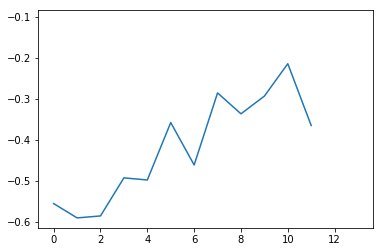

In [12]:
plt.plot(corr_array)
print("In image at first Correlation with EDU is positive but with time correlation become negative")

In [13]:
data.columns

Index(['store', 'brand', 'week', 'Unit_Sold', 'Adv', 'Price', 'AGE', 'EDU',
       'ETHNICITY', 'INCOME', 'Household', 'WOMENWORK', 'VALUE',
       'WAREHOUSE_DIST', 'RATIO_1', 'SUPERMARKET_DIST', 'RATIO_2'],
      dtype='object')

In [14]:
x_train_ = data[['store', 'brand', 'week', 'Adv', 'Price', 'AGE', 'EDU',
       'ETHNICITY', 'INCOME', 'Household', 'WOMENWORK', 'VALUE',
       'WAREHOUSE_DIST', 'RATIO_1', 'SUPERMARKET_DIST', 'RATIO_2']]
y_train_ = data['Unit_Sold']

In [15]:
le= LabelEncoder()
x_train_['brand'] = le.fit_transform(x_train_['brand'])

In [16]:
#baseline
X_train, X_test, y_train, y_test = train_test_split(x_train_, y_train_, test_size=0.02)
base = [np.average(y_test)]*y_test.shape[0]
np.sqrt(mean_squared_error(base, y_test))

1.0250957368843323

## Machine Learning Models
Application of different models to predict the unit sold on any future day

In [17]:
#descision tree
tr = tree.DecisionTreeRegressor()
tr = tr.fit(X_train, y_train)
predict2 = tr.predict(X_test)
print (np.sqrt(mean_squared_error(predict2, y_test)))

0.5311705001970192


In [18]:
#Random forest
rf = RandomForestRegressor(n_estimators=10)
rf = rf.fit(X_train, y_train)
predict1 = rf.predict(X_test)
print (np.sqrt(mean_squared_error(predict1, y_test)))

0.42921934106397863


In [19]:
#XGBoost
X_train, X_test, y_train, y_test = train_test_split(x_train_, y_train_, test_size=0.02)

model = xgb.XGBRegressor(max_depth=6)
model.fit(X_train, y_train)
predict3 = model.predict(X_test)
print (np.sqrt(mean_squared_error(predict3, y_test)))

0.4177243304444583


In [20]:
data= pd.read_csv('Data.csv')

Select the product and the store to apply lstm for future prediction.

## Deep Learning Model prediction

In [21]:
store = 2
brand = 'Health_Drink_A'

train = data[(data['store']==store) & (data['brand']==brand)]

In [22]:
data = []
pos = 0

for i in range(train.iloc[0]['week'], train.iloc[train.shape[0] - 1]['week']+1):
    if (train.iloc[pos]['week'] == i):
        data.append(train.iloc[pos]['Unit_Sold'])
        pos =pos+1
        
    else:
        data.append(data[-1])

In [23]:
data = pd.Series(data)

In the following cell the data for being fed to the LSTM is prepared. 10 objects are taken in a row and the tenth one is predicted with the help of the 9 previous data point.

In [24]:
series = pd.DataFrame()
window_size = 10

series_s = data.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)

Split the data into test and train.

In [25]:
nrow = round(0.8*series.shape[0])

In [26]:
train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]


In [27]:
from sklearn.utils import shuffle
train = shuffle(train)

In [29]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]


In [30]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [32]:
print (train_X.shape)
print (train_y.shape)
print (test_X.shape)
print (test_y.shape)

(89, 9)
(89,)
(22, 9)
(22,)


In [33]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

In [34]:
print (train_X.shape)
print (train_y.shape)
print (test_X.shape)
print (test_y.shape)

(89, 9, 1)
(89,)
(22, 9, 1)
(22,)


In [46]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(input_shape = (9,1), output_dim= 50, return_sequences = True))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 9, 50)             10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


Train the model

In [47]:
start = time.time()
model.fit(train_X,train_y,batch_size=32,nb_epoch=10,validation_split=0.1)
print("> Compilation Time : ", time.time() - start)

Train on 80 samples, validate on 9 samples
Epoch 1/10
80/80 [==============================] - 1s 12ms/step - loss: 80.5413 - val_loss: 68.0393
Epoch 2/10
80/80 [==============================] - 0s 760us/step - loss: 67.7370 - val_loss: 56.2372
Epoch 3/10
80/80 [==============================] - 0s 704us/step - loss: 56.5494 - val_loss: 44.7049
Epoch 4/10
80/80 [==============================] - 0s 707us/step - loss: 44.3749 - val_loss: 34.1853
Epoch 5/10
80/80 [==============================] - 0s 779us/step - loss: 35.6683 - val_loss: 25.2204
Epoch 6/10
80/80 [==============================] - 0s 741us/step - loss: 26.0984 - val_loss: 17.6246
Epoch 7/10
80/80 [==============================] - 0s 814us/step - loss: 19.2615 - val_loss: 11.3389
Epoch 8/10
80/80 [==============================] - 0s 640us/step - loss: 11.9878 - val_loss: 6.3515
Epoch 9/10
80/80 [==============================] - 0s 858us/step - loss: 8.2504 - val_loss: 2.9505
Epoch 10/10
80/80 [========================

In [48]:
preds = model.predict(test_X)
actuals = test_y

In [49]:
print ('Error--->' , np.sqrt(mean_squared_error(actuals,preds)))

Error---> 1.211833207365248


The next two plots are of the actual and the predicted value for future days. The plots come out to be similar.

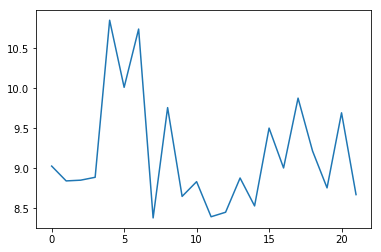

In [50]:
pyplot.plot(actuals)
pyplot.show()

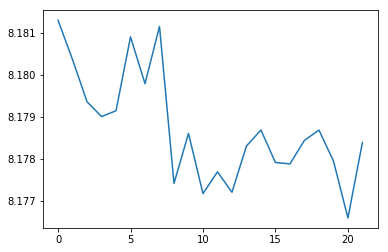

In [51]:
pyplot.plot(preds)
pyplot.show()